<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vader" data-toc-modified-id="Vader-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vader</a></span><ul class="toc-item"><li><span><a href="#Vader" data-toc-modified-id="Vader-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vader</a></span></li></ul></li><li><span><a href="#Text-Blob" data-toc-modified-id="Text-Blob-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text Blob</a></span></li><li><span><a href="#AFINN" data-toc-modified-id="AFINN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AFINN</a></span></li><li><span><a href="#Comparing-Methods" data-toc-modified-id="Comparing-Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing Methods</a></span></li></ul></div>

# Libraries

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# AFINN
from afinn import Afinn

# Scaler
from sklearn.preprocessing import MinMaxScaler

# External file
import random_functions
import lexicon_based



pd.set_option('display.max_columns', None)

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# functions = [func for func in dir(lexicon_based) if callable(getattr(lexicon_based, func))]

# # Print the list of functions
# print("Functions in the external module:")
# for func in functions:
#     print(func)

# Data

In [12]:
dataset = pd.read_csv('/Users/antoniooliveira/MannheimWMProject/processed_data.csv')

In [13]:
dataset.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Sentiment,Reviews_1
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2,Flight amazing. The crew onboard flight welcom...
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,0,Booking emergency exit seat still meant huge d...
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2,Excellent performance fronts. I would definite...
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2,Pretty comfortable flight considering I flying...
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2,The service consistently good start finish. Th...


In [45]:
# Sort sentiments
sorted_sentiment = sorted(dataset['Sentiment'].unique())


## Vader

In [14]:
dataset.dropna(inplace=True)

In [15]:
dataset["vader_polarity_compound"] = dataset["Reviews_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review)))

dataset["vader_polarity_scores"] = dataset["Reviews_1"].apply(lambda review : lexicon_based.vader_algorithm(str(review), compound = False))

In [16]:
dataset.groupby('Sentiment')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.252487,0.671934,-0.9928,-0.847675,-0.52785,0.4019,0.9953
1,1672.0,0.399248,0.646049,-0.9931,-0.120525,0.73305,0.9300,0.9964
2,3405.0,0.875072,0.256647,-0.9308,0.900100,0.95690,0.9779,0.9993


--------------------------------------------------------------------------------
                               Sentiment: 0


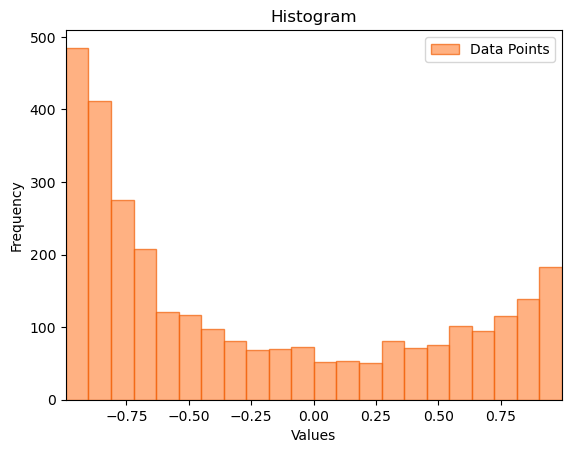


--------------------------------------------------------------------------------
                               Sentiment: 1


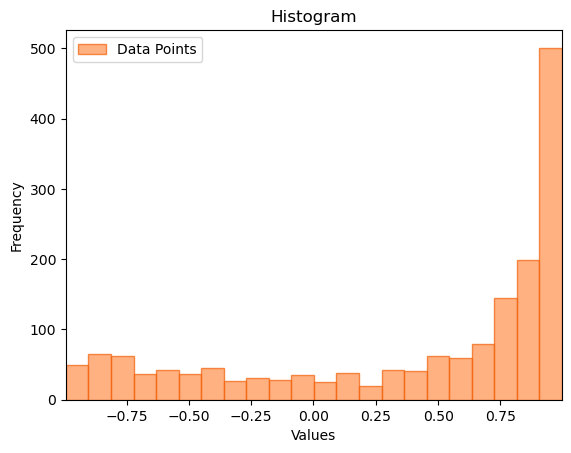


--------------------------------------------------------------------------------
                               Sentiment: 2


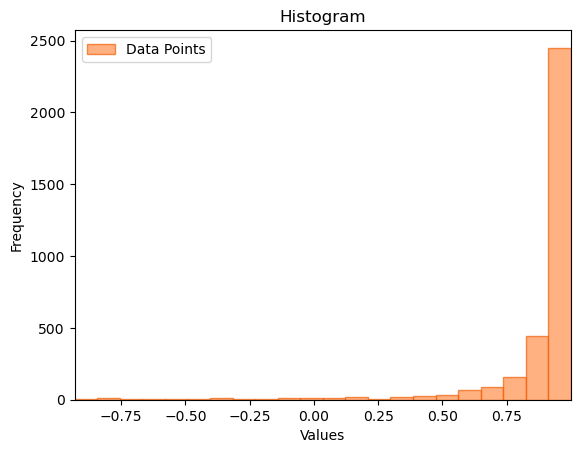

In [46]:
# Loop through sorted unique tags
for sentiment_ in sorted_sentiment:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {sentiment_}')
    random_functions.histogram(dataset[dataset['Sentiment'] == sentiment_]['vader_polarity_compound'])
    print('')


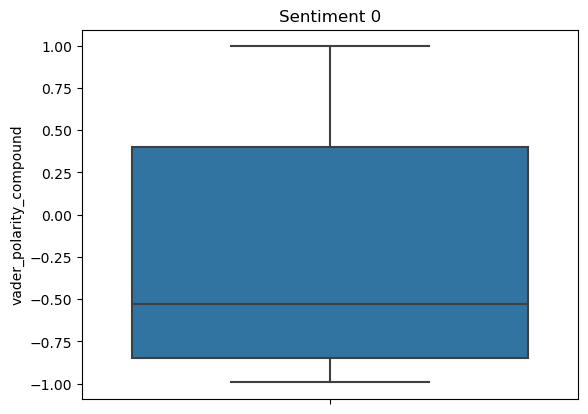

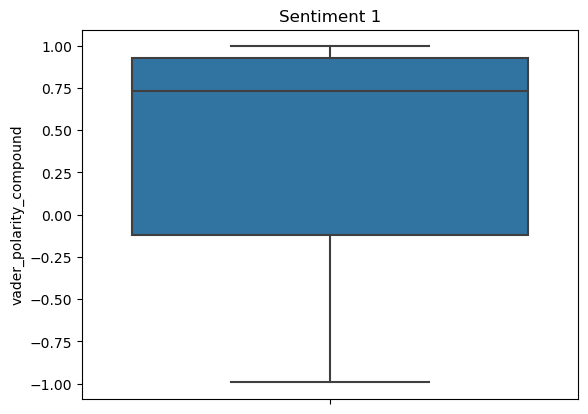

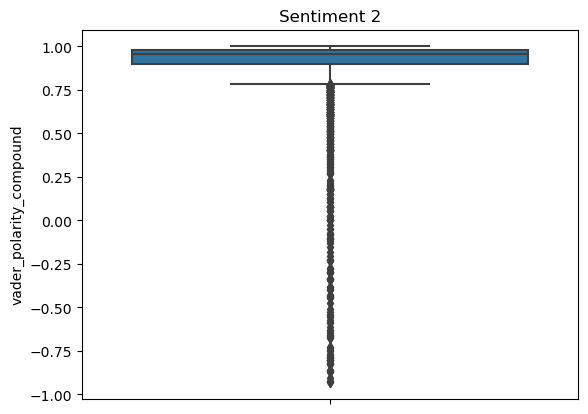

In [49]:
# Loop through sorted sentiment values
for sentiment in sorted_sentiment:
    # Filter data for the current sentiment
    filtered_data = dataset[dataset['Sentiment'] == sentiment]
    
    # Plot the boxplot
    sns.boxplot(data=filtered_data, y="vader_polarity_compound")
    plt.title(f'Sentiment {sentiment}')
    plt.show()

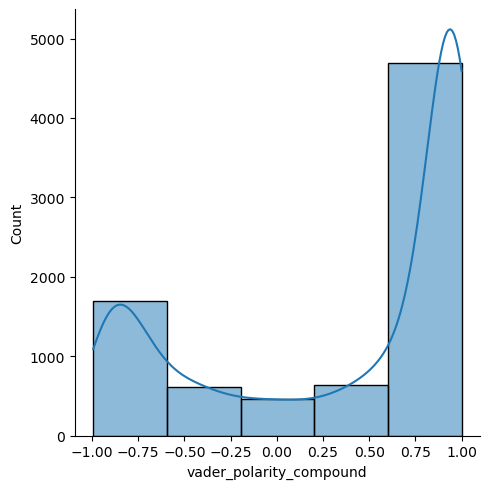

In [50]:
sns.displot(dataset["vader_polarity_compound"], kde=True, bins=5)
plt.show()

### Vader

In [68]:
data["vader_polarity_compound_2"] = data["Title"].apply(lambda song : vader_sa(str(song)))

data["vader_polarity_scores_2"] = data["Title"].apply(lambda song : vader_sa(str(song), compound = False))

In [69]:
data.groupby('Sentiment')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.129558,0.650024,-0.9914,-0.7430,-0.27320,0.4939,0.9944
1,1672.0,0.422056,0.588594,-0.9868,0.0258,0.68080,0.9022,0.9938
2,3406.0,0.802642,0.293201,-0.9300,0.7906,0.91255,0.9571,0.9984


--------------------------------------------------------------------------------
                               Sentiment: 0


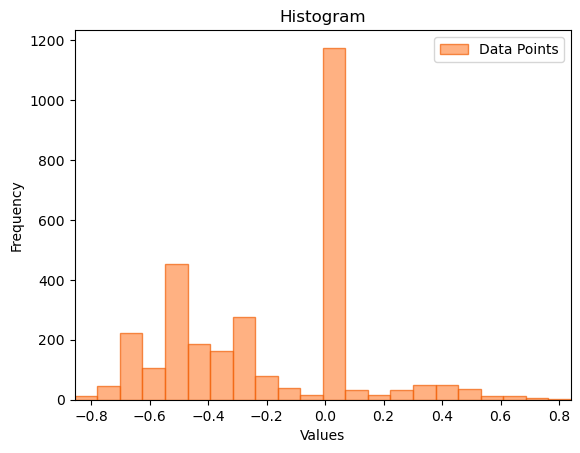


--------------------------------------------------------------------------------
                               Sentiment: 1


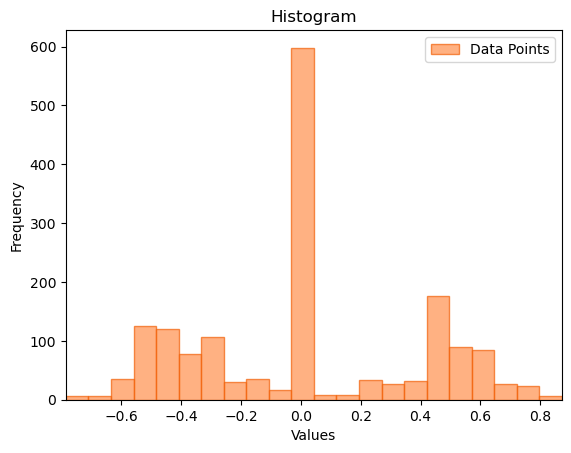


--------------------------------------------------------------------------------
                               Sentiment: 2


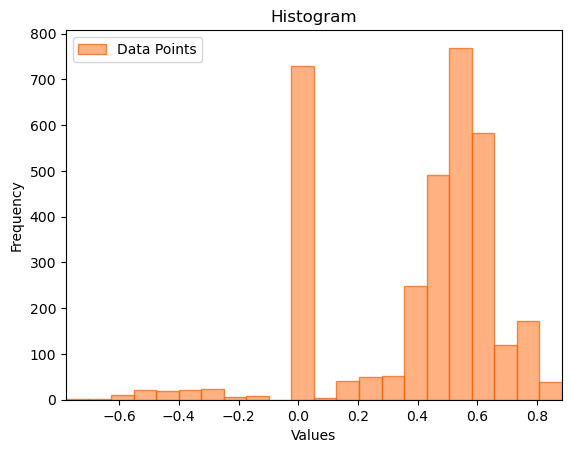

In [70]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Sentiment'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {tag}')
    functions.histogram(data[data['Sentiment'] == tag]['vader_polarity_compound_2'])
    print('')


In [ ]:
# maybe join scores of title + reviews and give them weights

## Text Blob

In [25]:
dataset["textblob_polarity_compound"] = dataset["Reviews_1"].apply(lambda song : textblob_sa(str(song)))

In [26]:
dataset.groupby('Sentiment')['textblob_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-0.024396,0.181879,-1.000000,-0.116667,-0.009902,0.078085,1.0
1,1672.0,0.112089,0.170221,-1.000000,0.014012,0.114794,0.212289,0.8
2,3405.0,0.321930,0.163338,-0.666667,0.219331,0.315278,0.417500,1.0


--------------------------------------------------------------------------------
                               Sentiment: 0


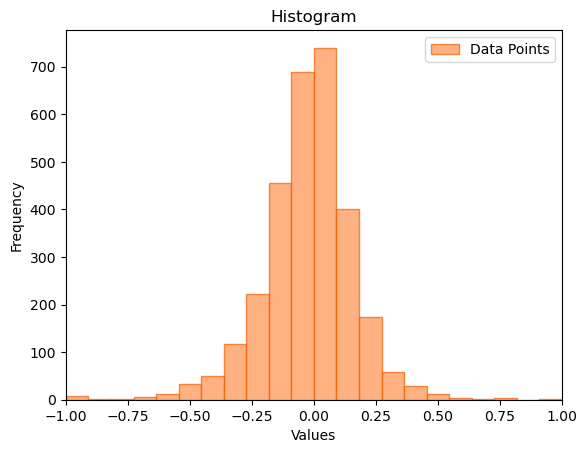


--------------------------------------------------------------------------------
                               Sentiment: 1


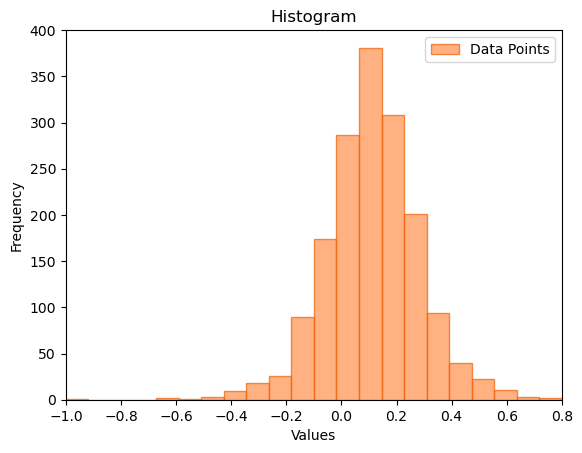


--------------------------------------------------------------------------------
                               Sentiment: 2


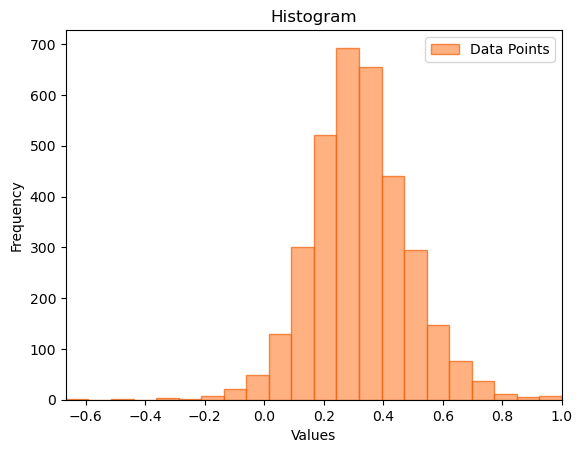

In [47]:
# Loop through sorted unique tags
for sentiment_ in sorted_sentiment:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {sentiment_}')
    random_functions.histogram(dataset[dataset['Sentiment'] == sentiment_]['textblob_polarity_compound'])
    print('')


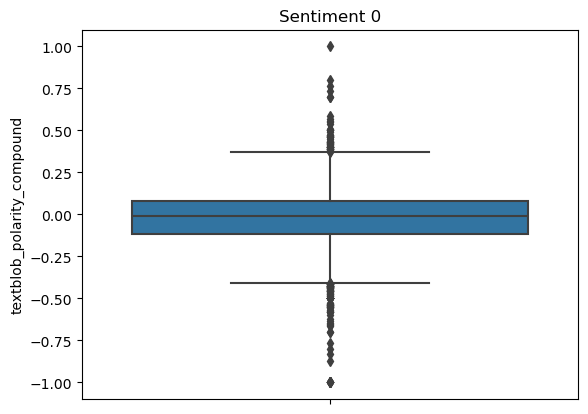

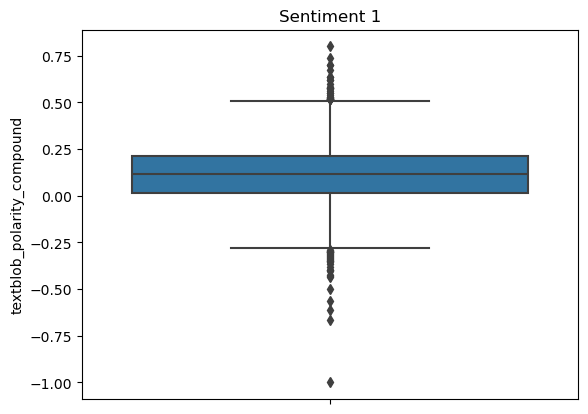

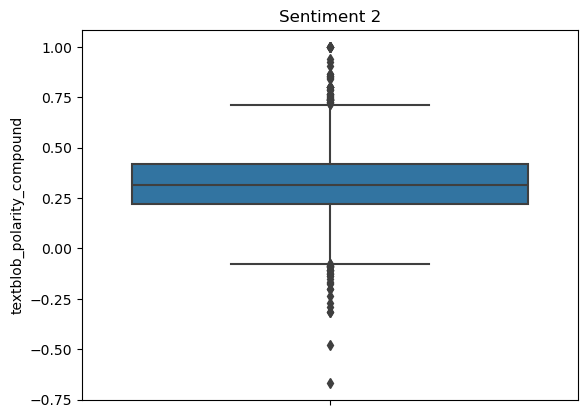

In [48]:
# Loop through sorted sentiment values
for sentiment in sorted_sentiment:
    # Filter data for the current sentiment
    filtered_data = dataset[dataset['Sentiment'] == sentiment]
    
    # Plot the boxplot
    sns.boxplot(data=filtered_data, y="textblob_polarity_compound")
    plt.title(f'Sentiment {sentiment}')
    plt.show()

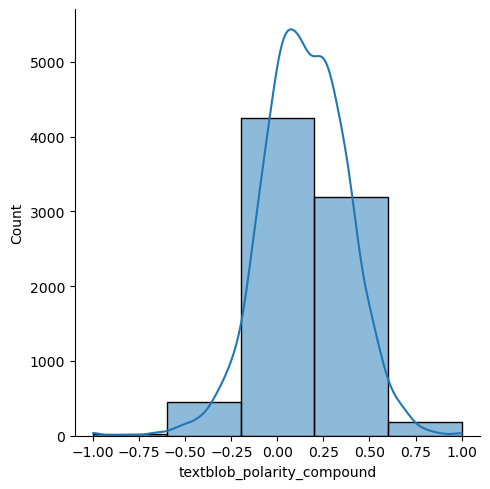

In [51]:
sns.displot(dataset["textblob_polarity_compound"], kde=True, bins=5)
plt.show()

## AFINN

In [31]:
afinn = Afinn()

dataset['Afinn_polarity_compound'] = dataset['Reviews_1'].apply(lambda x: 
                                              afinn.score(x))

In [32]:
dataset.groupby('Sentiment')['Afinn_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
0,3022.0,-4.011582,7.902011,-46.0,-8.0,-4.0,0.0,51.0
1,1672.0,4.867823,9.389624,-36.0,-1.0,4.0,10.0,45.0
2,3405.0,14.209985,9.557496,-16.0,8.0,13.0,19.0,108.0


--------------------------------------------------------------------------------
                               Sentiment: 0


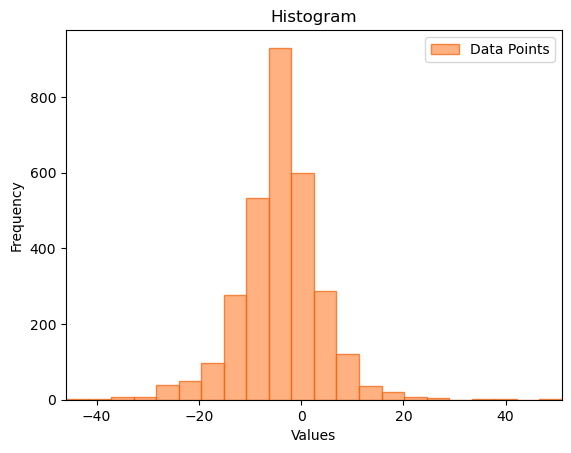


--------------------------------------------------------------------------------
                               Sentiment: 1


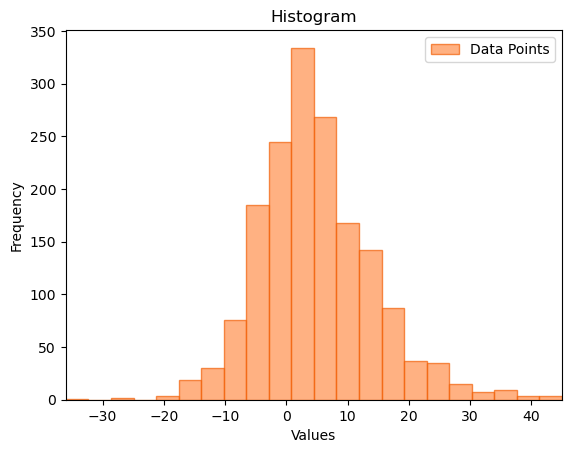


--------------------------------------------------------------------------------
                               Sentiment: 2


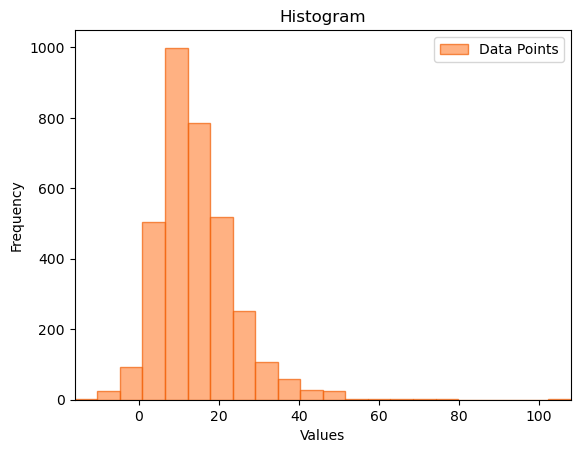

In [43]:
# Loop through sorted unique tags
for sentiment_ in sorted_sentiment:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {sentiment_}')
    random_functions.histogram(dataset[dataset['Sentiment'] == sentiment_]['Afinn_polarity_compound'])
    print('')


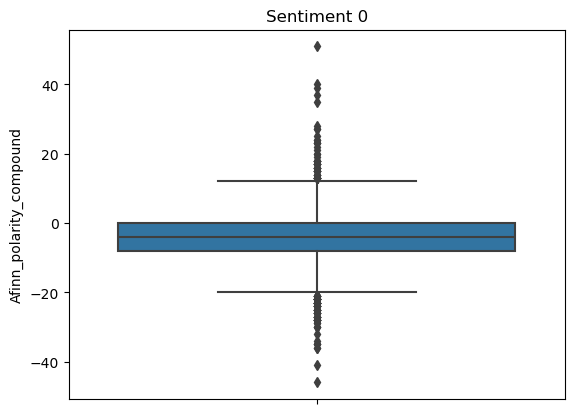

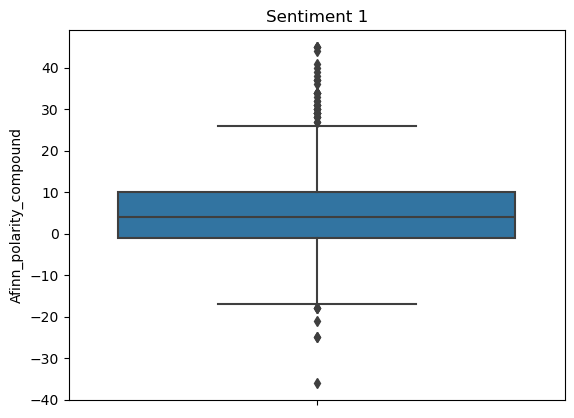

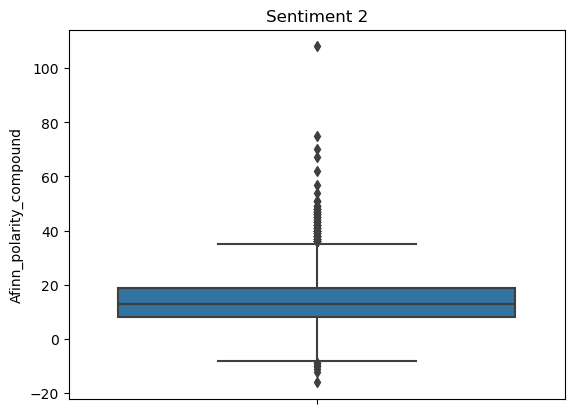

In [44]:
# Loop through sorted sentiment values
for sentiment in sorted_sentiment:
    # Filter data for the current sentiment
    filtered_data = dataset[dataset['Sentiment'] == sentiment]
    
    # Plot the boxplot
    sns.boxplot(data=filtered_data, y="Afinn_polarity_compound")
    plt.title(f'Sentiment {sentiment}')
    plt.show()

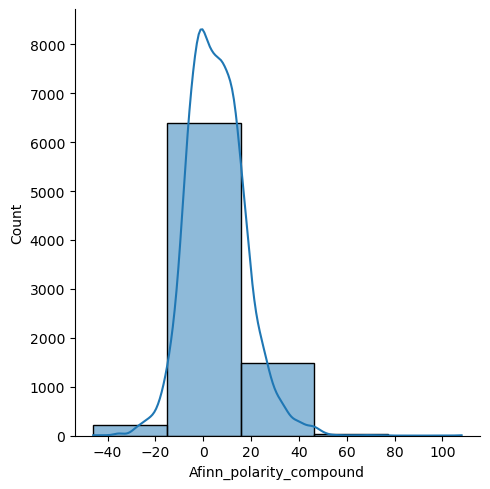

In [52]:
sns.displot(dataset["Afinn_polarity_compound"], kde=True, bins=5)
plt.show()

**Normalised AFINN**

In [60]:
scaler = MinMaxScaler(feature_range = (-1,1))

afinn_normalized_polarity = scaler.fit_transform(dataset["Afinn_polarity_compound"].to_numpy().reshape(-1, 1))

In [61]:
dataset["Afinn_normalized_polarity"] = afinn_normalized_polarity.reshape(-1)
dataset[['Reviews_1', 'Afinn_polarity_compound', 'Afinn_normalized_polarity']].describe()

,Afinn_polarity_compound,Afinn_normalized_polarity
count,8099.000000,8099.000000
mean,5.482282,-0.331399
std,12.067585,0.156722
min,-46.000000,-1.000000
25%,-3.000000,-0.441558
50%,5.000000,-0.337662
75%,13.000000,-0.233766
max,108.000000,1.000000


--------------------------------------------------------------------------------
                               Sentiment: 0


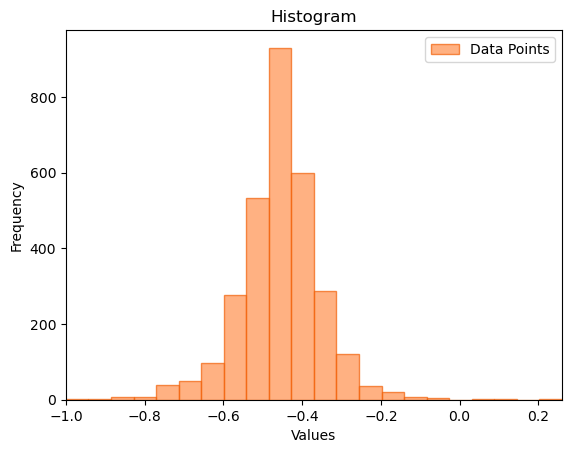


--------------------------------------------------------------------------------
                               Sentiment: 1


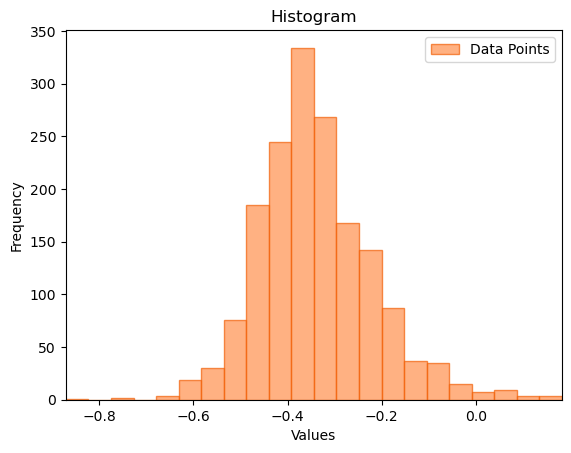


--------------------------------------------------------------------------------
                               Sentiment: 2


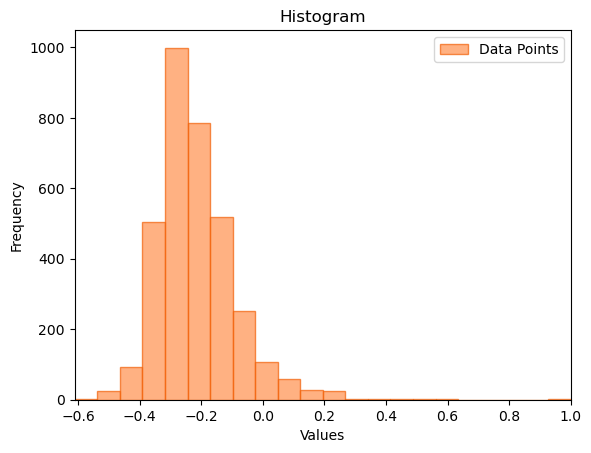

In [55]:
# Loop through sorted unique tags
for sentiment_ in sorted_sentiment:
    print('--' * 40)
    print(' ' * 30, f'Sentiment: {sentiment_}')
    random_functions.histogram(dataset[dataset['Sentiment'] == sentiment_]['Afinn_normalized_polarity'])
    print('')


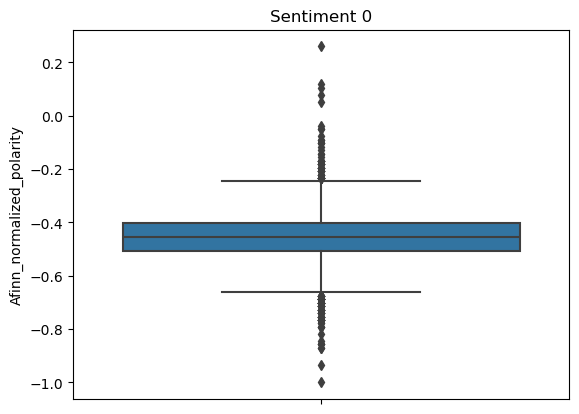

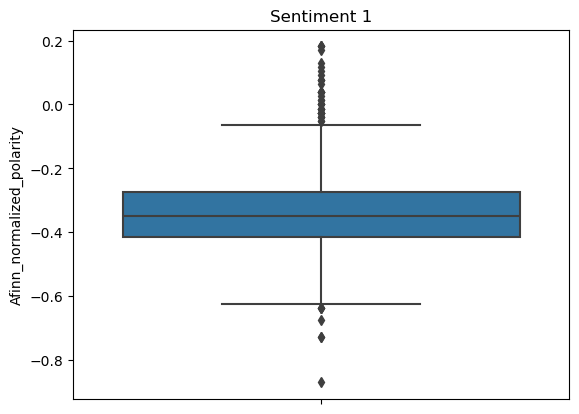

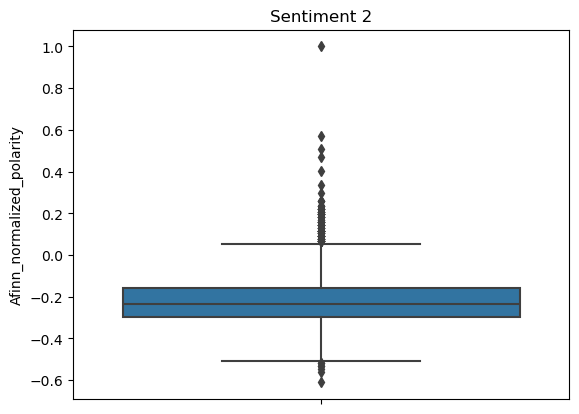

In [56]:
# Loop through sorted sentiment values
for sentiment in sorted_sentiment:
    # Filter data for the current sentiment
    filtered_data = dataset[dataset['Sentiment'] == sentiment]
    
    # Plot the boxplot
    sns.boxplot(data=filtered_data, y="Afinn_normalized_polarity")
    plt.title(f'Sentiment {sentiment}')
    plt.show()

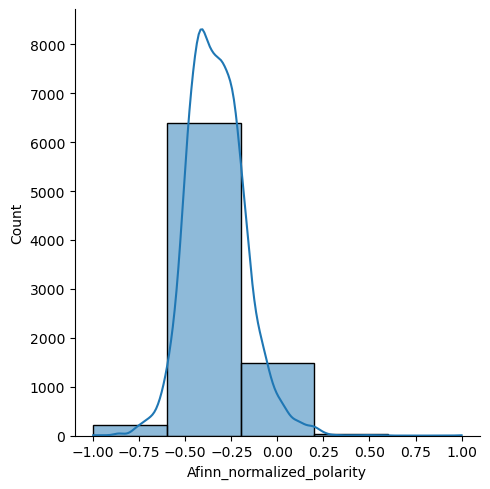

In [57]:
sns.displot(dataset["Afinn_normalized_polarity"], kde=True, bins=5)
plt.show()

## Comparing Methods

In [51]:
compare = ['vader_polarity_compound', 'textblob_polarity_compound', 'afinn_normalized_polarity']

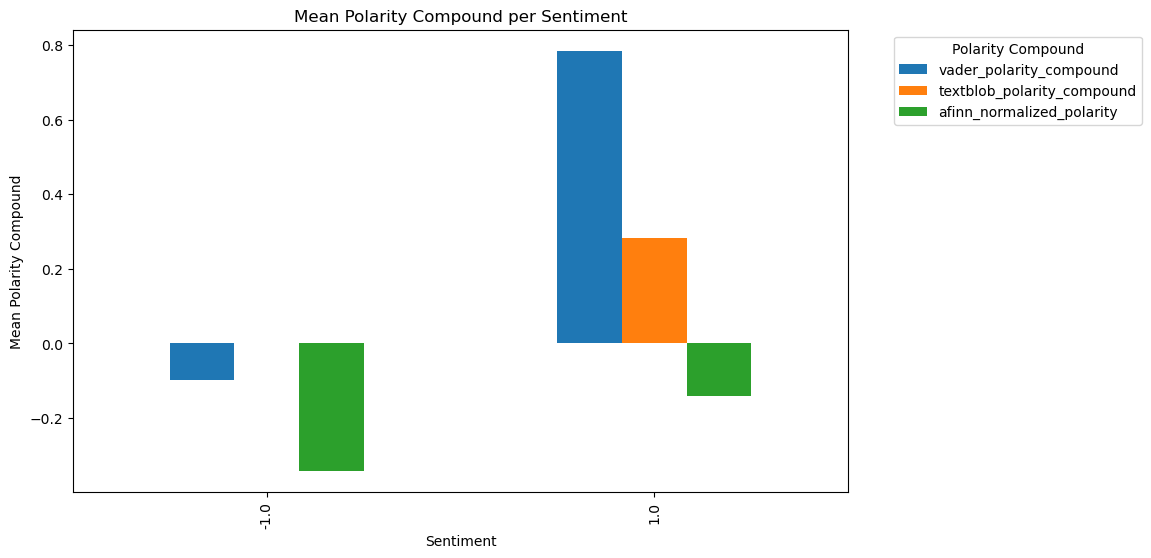

In [52]:
means_by_tag = dataset.groupby('Sentiment')[compare].mean()

# Plot the means
ax = means_by_tag.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Polarity Compound per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Mean Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

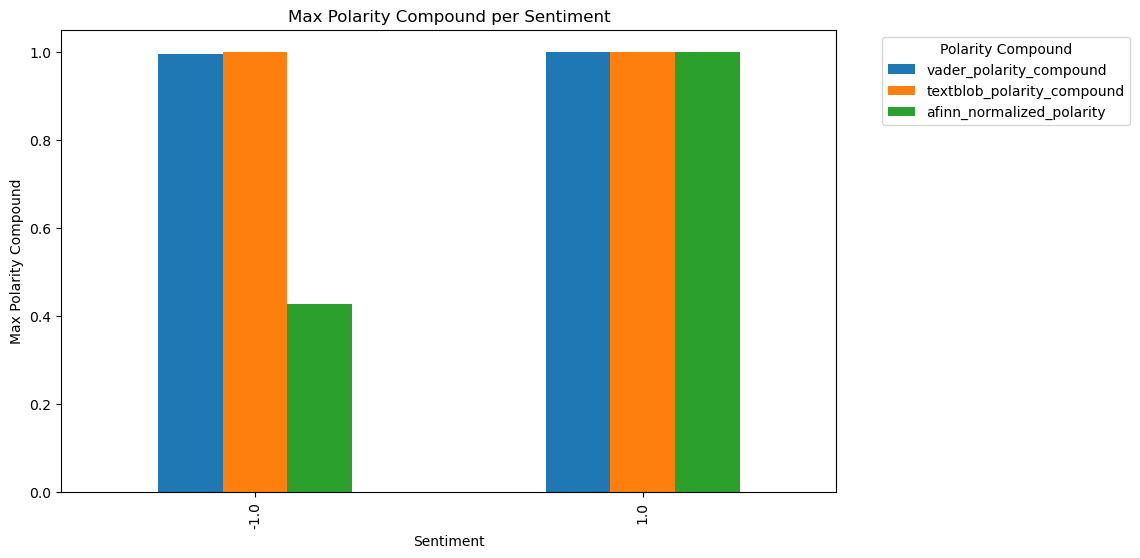

In [53]:
means_by_tag = dataset.groupby('Sentiment')[compare].max()

# Plot the means
ax = means_by_tag.plot(kind='bar', figsize=(10, 6))
plt.title('Max Polarity Compound per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Max Polarity Compound')

# Change the legend location to the upper right
ax.legend(title='Polarity Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()